In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB7


In [7]:
train_df = pd.read_csv('/kaggle/input/city-dataset/train_data.csv')
test_df = pd.read_csv('/kaggle/input/city-dataset/test.csv')


In [8]:
def load_images(df, img_dir):
    images = []
    labels = []
    for idx, row in df.iterrows():
        img = load_img(os.path.join(img_dir, row['filename']), target_size=(224, 224))
        img = img_to_array(img) / 255.0  
        images.append(img)
        labels.append(row['city'])
    
    images = np.array(images)
    labels = pd.get_dummies(labels).values  # One-hot encoding
    return images, labels


In [9]:
train_images, train_labels = load_images(train_df, '/kaggle/input/city-dataset/train/train')
test_images, _ = load_images(test_df, '/kaggle/input/city-dataset/test/test')

In [10]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 sınıf (Istanbul, Ankara, Izmir)
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


I0000 00:00:1735058963.642632     128 service.cc:145] XLA service 0x7918d4154e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735058963.642691     128 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1735058963.642695     128 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/175 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.3906 - loss: 1.3172 

I0000 00:00:1735058969.771830     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 146ms/step - accuracy: 0.3577 - loss: 1.2790 - val_accuracy: 0.3329 - val_loss: 1.1853
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.4184 - loss: 1.0873 - val_accuracy: 0.4879 - val_loss: 1.0367
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.4729 - loss: 1.0351 - val_accuracy: 0.4664 - val_loss: 1.0453
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.4761 - loss: 1.0327 - val_accuracy: 0.4164 - val_loss: 1.0802
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.4773 - loss: 1.0311 - val_accuracy: 0.4200 - val_loss: 1.0706
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.4829 - loss: 1.0225 - val_accuracy: 0.5086 - val_loss: 1.0169
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.4925 - loss: 1.0077 - val_accuracy: 0.4536 - val_loss: 1.0575
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.5020 - loss: 1.0063 - val

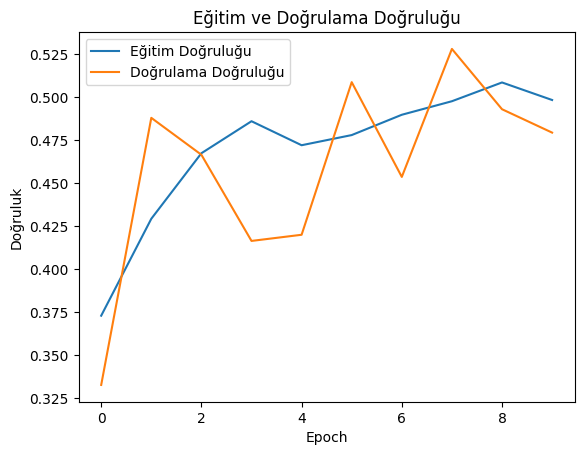

In [14]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [16]:
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(3, activation='softmax')  
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 63s 266ms/step - accuracy: 0.5348 - loss: 2.5381 - val_accuracy: 0.6821 - val_loss: 0.8295
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 172ms/step - accuracy: 0.8336 - loss: 0.4318 - val_accuracy: 0.7364 - val_loss: 0.7112
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 175ms/step - accuracy: 0.8578 - loss: 0.3544 - val_accuracy: 0.7600 - val_loss: 0.6569
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.9455 - loss: 0.1615 - val_accuracy: 0.7457 - val_loss: 0.7749
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.9412 - loss: 0.1576 - val_accuracy: 0.7536 - val_loss: 0.8149
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.9861 - loss: 0.0593 - val_accuracy: 0.7750 - val_loss: 0.7850
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.9934 - loss: 0.0355 - val_accuracy: 0.7750 - val_loss: 0.9090
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.9962 - loss: 0

44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step


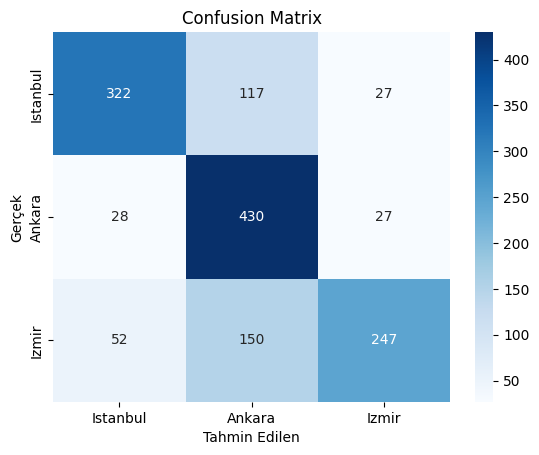

              precision    recall  f1-score   support

    Istanbul       0.80      0.69      0.74       466
      Ankara       0.62      0.89      0.73       485
       Izmir       0.82      0.55      0.66       449

    accuracy                           0.71      1400
   macro avg       0.75      0.71      0.71      1400
weighted avg       0.74      0.71      0.71      1400



In [17]:
val_split_index = int(len(train_images) * 0.8)  # %80 eğitim, %20 doğrulama
val_images = train_images[val_split_index:]
val_labels = train_labels[val_split_index:]

val_predictions = model.predict(val_images)
val_predicted_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Istanbul', 'Ankara', 'Izmir'], yticklabels=['Istanbul', 'Ankara', 'Izmir'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(val_true_classes, val_predicted_classes, target_names=['Istanbul', 'Ankara', 'Izmir'])
print(report)

In [18]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.3261 - loss: 1.1122 - val_accuracy: 0.3207 - val_loss: 1.0999
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3309 - loss: 1.0991 - val_accuracy: 0.3207 - val_loss: 1.1001
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3377 - loss: 1.0988 - val_accuracy: 0.3179 - val_loss: 1.0989
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3265 - loss: 1.0988 - val_accuracy: 0.3207 - val_loss: 1.0997
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3345 - loss: 1.0989 - val_accuracy: 0.3329 - val_loss: 1.0989
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.3426 - loss: 1.0986 - val_accuracy: 0.3329 - val_loss: 1.0991
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.3386 - loss: 1.0984 - val_accuracy: 0.3329 - val_loss: 1.0989
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 4

In [19]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[-20:]:  
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 sınıf (Istanbul, Ankara, Izmir)
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 168s 937ms/step - accuracy: 0.5441 - loss: 0.9230 - val_accuracy: 0.3207 - val_loss: 1.1043
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.8383 - loss: 0.4188 - val_accuracy: 0.3207 - val_loss: 1.1385
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.9222 - loss: 0.2369 - val_accuracy: 0.3321 - val_loss: 1.1221
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - accuracy: 0.9592 - loss: 0.1294 - val_accuracy: 0.3486 - val_loss: 1.7248
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.9752 - loss: 0.0796 - val_accuracy: 0.3736 - val_loss: 1.8045
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.9850 - loss: 0.0530 - val_accuracy: 0.3600 - val_loss: 1.6053
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.9922 - loss: 0.0291 - val_accuracy: 0.4243 - val_loss: 1.7010
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.9916 - loss: 0.0251 - val_acc

44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step


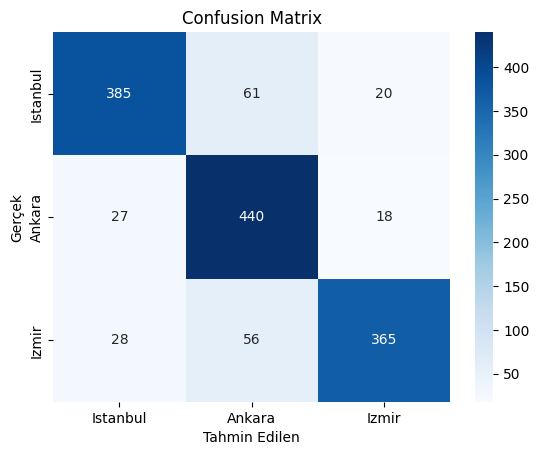

              precision    recall  f1-score   support

    Istanbul       0.88      0.83      0.85       466
      Ankara       0.79      0.91      0.84       485
       Izmir       0.91      0.81      0.86       449

    accuracy                           0.85      1400
   macro avg       0.86      0.85      0.85      1400
weighted avg       0.86      0.85      0.85      1400



In [20]:
val_split_index = int(len(train_images) * 0.8)  # %80 eğitim, %20 doğrulama
val_images = train_images[val_split_index:]
val_labels = train_labels[val_split_index:]

val_predictions = model.predict(val_images)
val_predicted_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Istanbul', 'Ankara', 'Izmir'], yticklabels=['Istanbul', 'Ankara', 'Izmir'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(val_true_classes, val_predicted_classes, target_names=['Istanbul', 'Ankara', 'Izmir'])
print(report)

In [22]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),  # Overfitting'i önlemek için Dropout ekliyoruz
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_split=0.2)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 228ms/step - accuracy: 0.5490 - loss: 0.9333 - val_accuracy: 0.6971 - val_loss: 0.7222
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.7047 - loss: 0.7034 - val_accuracy: 0.7114 - val_loss: 0.6784
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.7350 - loss: 0.6480 - val_accuracy: 0.7300 - val_loss: 0.6642
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.7622 - loss: 0.5911 - val_accuracy: 0.7307 - val_loss: 0.6523
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.7877 - loss: 0.5359 - val_accuracy: 0.7564 - val_loss: 0.6044
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.8024 - loss: 0.5094 - val_accuracy: 0.7479 - val_loss: 0.6183
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.8207 - loss: 0.4711 - val_accuracy: 0.7629 - val_loss: 0.5938
Epoch 8/15
175/175 ━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step


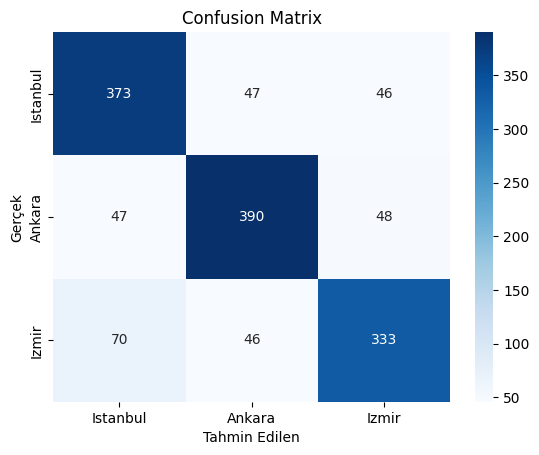

              precision    recall  f1-score   support

    Istanbul       0.76      0.80      0.78       466
      Ankara       0.81      0.80      0.81       485
       Izmir       0.78      0.74      0.76       449

    accuracy                           0.78      1400
   macro avg       0.78      0.78      0.78      1400
weighted avg       0.78      0.78      0.78      1400



In [23]:
val_split_index = int(len(train_images) * 0.8)  # %80 eğitim, %20 doğrulama
val_images = train_images[val_split_index:]
val_labels = train_labels[val_split_index:]

val_predictions = model.predict(val_images)
val_predicted_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Istanbul', 'Ankara', 'Izmir'], yticklabels=['Istanbul', 'Ankara', 'Izmir'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(val_true_classes, val_predicted_classes, target_names=['Istanbul', 'Ankara', 'Izmir'])
print(report)

In [ ]:
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[-20:]:  
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),  # Daha büyük model için daha yüksek Dropout
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15


44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 505ms/step


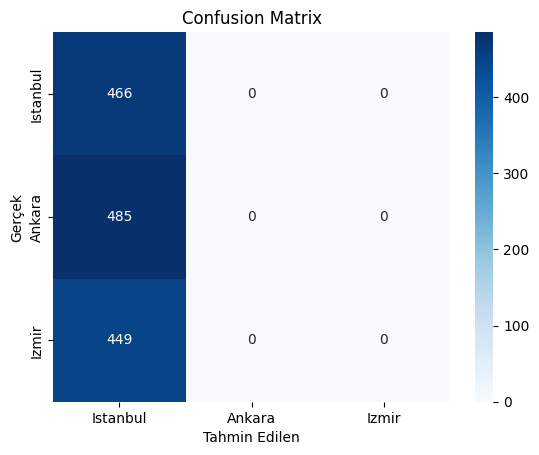

              precision    recall  f1-score   support

    Istanbul       0.33      1.00      0.50       466
      Ankara       0.00      0.00      0.00       485
       Izmir       0.00      0.00      0.00       449

    accuracy                           0.33      1400
   macro avg       0.11      0.33      0.17      1400
weighted avg       0.11      0.33      0.17      1400



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
val_split_index = int(len(train_images) * 0.8)  # %80 eğitim, %20 doğrulama
val_images = train_images[val_split_index:]
val_labels = train_labels[val_split_index:]

val_predictions = model.predict(val_images)
val_predicted_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Istanbul', 'Ankara', 'Izmir'], yticklabels=['Istanbul', 'Ankara', 'Izmir'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(val_true_classes, val_predicted_classes, target_names=['Istanbul', 'Ankara', 'Izmir'])
print(report)